In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



Get the Data and Analyse the Data

In [49]:
#loading the data set from csv file to a Pandas DataFrame
sensor_data = pd.read_csv('gas_sensor.csv')

In [50]:
#First 10 rows of data sets
sensor_data.head(10)

,Gas Value,Gas Increase Rate,Temperature,Gas,Fire state
0,254,2,35,no gas,no fire
1,233,6,27,no gas,no fire
2,232,1,28,no gas,no fire
3,350,66,42,co2,fire
4,365,82,48,co2,fire
5,344,23,38,co2,no fire
6,355,56,44,co2,fire
7,366,88,46,co2,fire
8,358,93,42,co2,fire
9,325,26,36,co2,no fire


In [51]:
#number of columns and rows
sensor_data.shape

(50, 5)

In [52]:
#getting info about data set
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gas Value          50 non-null     int64 
 1   Gas Increase Rate  50 non-null     int64 
 2   Temperature        50 non-null     int64 
 3   Gas                50 non-null     object
 4   Fire state         50 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [53]:
#checking missing values
sensor_data.isnull().sum()

Gas Value            0
Gas Increase Rate    0
Temperature          0
Gas                  0
Fire state           0
dtype: int64

In [54]:
#Statistical Analysis of data
sensor_data.describe()

,Gas Value,Gas Increase Rate,Temperature
count,50.000000,50.000000,50.000000
mean,405.960000,69.820000,37.060000
std,125.283997,51.503394,7.385618
min,222.000000,1.000000,23.000000
25%,322.750000,26.000000,32.000000
50%,371.000000,59.000000,36.000000
75%,516.500000,117.500000,43.500000
max,640.000000,185.000000,50.000000


C:\Users\2001w\AppData\Local\Temp\ipykernel_12528\3314887274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sensor_data['Gas Value'])


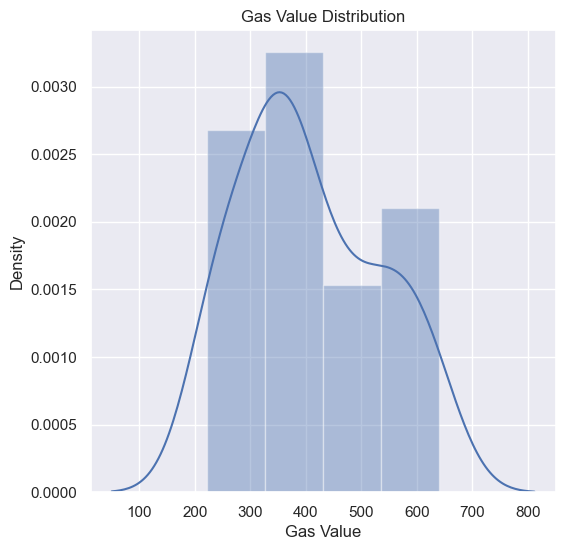

In [55]:
# Age distribution analysis
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(sensor_data['Gas Value'])
plt.title('Gas Value Distribution')
plt.show()

C:\Users\2001w\AppData\Local\Temp\ipykernel_12528\380191125.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sensor_data['Gas Increase Rate'])


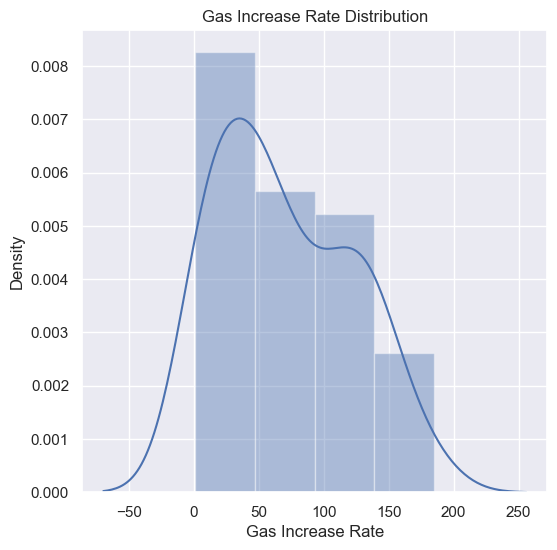

In [56]:
#Gas Increase Rate Distribution
plt.figure(figsize=(6,6))
sns.distplot(sensor_data['Gas Increase Rate'])
plt.title('Gas Increase Rate Distribution')
plt.show()


C:\Users\2001w\AppData\Local\Temp\ipykernel_12528\3922102386.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sensor_data['Temperature'])


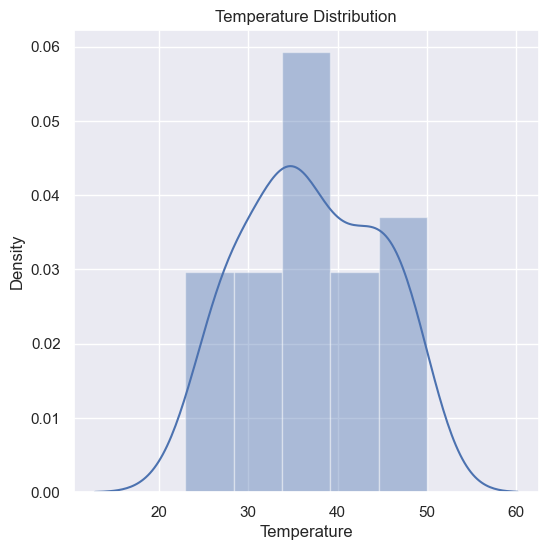

In [57]:
#Temperature Distribution
plt.figure(figsize=(6,6))
sns.distplot(sensor_data['Temperature'])
plt.title('Temperature Distribution')
plt.show()

In [58]:

#Children Distribution
sensor_data['Gas'].value_counts()

Gas
butane    24
co2       17
no gas     9
Name: count, dtype: int64

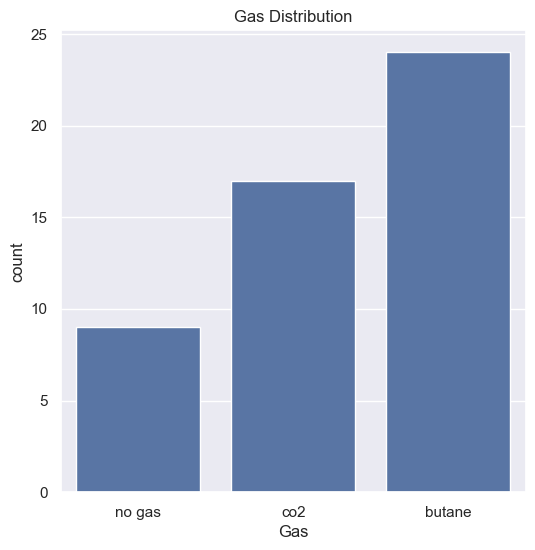

In [59]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gas',data=sensor_data)
plt.title('Gas Distribution')
plt.show()

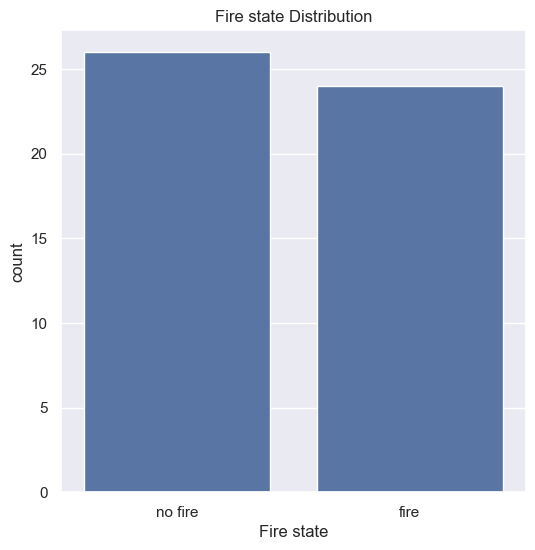

In [60]:
plt.figure(figsize=(6,6))
sns.countplot(x='Fire state',data=sensor_data)
plt.title('Fire state Distribution')
plt.show()

In [61]:
#Region column
sensor_data['Fire state'].value_counts()

Fire state
no fire    26
fire       24
Name: count, dtype: int64

Data Pre-Processing

Model training

Randomforest training model


In [62]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming sensor_data is the DataFrame with your data

# Clean up column names by removing any leading/trailing spaces
sensor_data.columns = sensor_data.columns.str.strip()

# Prepare the data
X = sensor_data[['Gas Value', 'Gas Increase Rate', 'Temperature']]  # Features

# Encode the target variables (Gas and Fire state)
le_gas = LabelEncoder()
le_fire = LabelEncoder()

# Encode the 'Gas' and 'Fire state' columns
sensor_data['Gas_encoded'] = le_gas.fit_transform(sensor_data['Gas'])
sensor_data['Fire_encoded'] = le_fire.fit_transform(sensor_data['Fire state'])

# Splitting the data for Gas type prediction
X_train_gas, X_test_gas, y_train_gas, y_test_gas = train_test_split(X, sensor_data['Gas_encoded'], test_size=0.2, random_state=42)

# Splitting the data for Fire state prediction
X_train_fire, X_test_fire, y_train_fire, y_test_fire = train_test_split(X, sensor_data['Fire_encoded'], test_size=0.2, random_state=42)

# Initialize Random Forest Classifier for both predictions
rf_gas = RandomForestClassifier(random_state=42)
rf_fire = RandomForestClassifier(random_state=42)

# Train the models
rf_gas.fit(X_train_gas, y_train_gas)
rf_fire.fit(X_train_fire, y_train_fire)

# Predicting on the test set
y_pred_gas = rf_gas.predict(X_test_gas)
y_pred_fire = rf_fire.predict(X_test_fire)

# Calculate accuracy
accuracy_gas = accuracy_score(y_test_gas, y_pred_gas)
accuracy_fire = accuracy_score(y_test_fire, y_pred_fire)

# Generate classification reports for detailed metrics
# Use inverse_transform on y_test and y_pred instead of sorting
report_gas = classification_report(le_gas.inverse_transform(y_test_gas), le_gas.inverse_transform(y_pred_gas), target_names=le_gas.classes_)
report_fire = classification_report(le_fire.inverse_transform(y_test_fire), le_fire.inverse_transform(y_pred_fire), target_names=le_fire.classes_)

# Output the results
print(f"Gas Type Prediction Accuracy: {accuracy_gas}")
print(f"Gas Type Classification Report:\n{report_gas}")
print(f"Fire State Prediction Accuracy: {accuracy_fire}")
print(f"Fire State Classification Report:\n{report_fire}")


Gas Type Prediction Accuracy: 0.9
Gas Type Classification Report:
              precision    recall  f1-score   support

      butane       1.00      0.86      0.92         7
         co2       0.67      1.00      0.80         2
      no gas       1.00      1.00      1.00         1

    accuracy                           0.90        10
   macro avg       0.89      0.95      0.91        10
weighted avg       0.93      0.90      0.91        10

Fire State Prediction Accuracy: 0.7
Fire State Classification Report:
              precision    recall  f1-score   support

        fire       0.57      1.00      0.73         4
     no fire       1.00      0.50      0.67         6

    accuracy                           0.70        10
   macro avg       0.79      0.75      0.70        10
weighted avg       0.83      0.70      0.69        10



prediction and Rsquared value calculation

In [64]:
from sklearn.metrics import r2_score

# Compute R-squared values for both the training and testing sets
# For Gas prediction
y_train_pred_gas = rf_gas.predict(X_train_gas)
r2_train_gas = r2_score(y_train_gas, y_train_pred_gas)
r2_test_gas = r2_score(y_test_gas, y_pred_gas)

# For Fire prediction
y_train_pred_fire = rf_fire.predict(X_train_fire)
r2_train_fire = r2_score(y_train_fire, y_train_pred_fire)
r2_test_fire = r2_score(y_test_fire, y_pred_fire)

# Print the R-squared values
print(f"R-squared (Gas) - Training Set: {r2_train_gas}")
print(f"R-squared (Gas) - Testing Set: {r2_test_gas}")
print(f"R-squared (Fire) - Training Set: {r2_train_fire}")
print(f"R-squared (Fire) - Testing Set: {r2_test_fire}")

# Now, let's predict the values for new input data
input_data = [[500, 5, 30]]  # Example input: [Gas Value, Gas Increase Rate, Temperature]

# Predict Gas type and Fire state for the input data
gas_prediction = le_gas.inverse_transform(rf_gas.predict(input_data))[0]
fire_prediction = le_fire.inverse_transform(rf_fire.predict(input_data))[0]

print(f"Predicted Gas Type: {gas_prediction}")
print(f"Predicted Fire State: {fire_prediction}")


R-squared (Gas) - Training Set: 1.0
R-squared (Gas) - Testing Set: 0.7727272727272727
R-squared (Fire) - Training Set: 1.0
R-squared (Fire) - Testing Set: -0.24999999999999978
Predicted Gas Type: butane
Predicted Fire State: no fire


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
import pickle

# Save the trained models and encoders into a pickle file
with open('Fire_prediction.pkl', 'wb') as f:
    # Dump the random forest models and label encoders
    pickle.dump((rf_gas, rf_fire, le_gas, le_fire), f)

print("Models and encoders saved successfully to Fire_prediction.pkl")


Models and encoders saved successfully to Fire_prediction.pkl
